# Veri Görselleştirme

In [1]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Excel dosyasını yükle
file_path = '../data/elektrik_veri_hashed.xlsx'
xls = pd.ExcelFile(file_path)

# Sayfa isimlerini görüntüle
print("Sayfa isimleri:", xls.sheet_names)

# Her sayfayı ayrı DataFrame'e yükle
df_tahsilat = pd.read_excel(xls, sheet_name='Tahsilat')
df_tahsilat_1 = pd.read_excel(xls, sheet_name='Tahsilat 1')
df_tahakkuk = pd.read_excel(xls, sheet_name='Tahakkuk')      # Hamamözü
df_tahakkuk_1 = pd.read_excel(xls, sheet_name='Tahakkuk 1')  # Gümüşhacıköy
df_tahakkuk_2 = pd.read_excel(xls, sheet_name='Tahakkuk 2')  # Göynücek

# DataFrame boyutlarını kontrol et
print(f"Tahsilat: {df_tahsilat.shape}")
print(f"Tahsilat 1: {df_tahsilat_1.shape}")
print(f"Tahakkuk (Hamamözü): {df_tahakkuk.shape}")
print(f"Tahakkuk 1 (Gümüşhacıköy): {df_tahakkuk_1.shape}")
print(f"Tahakkuk 2 (Göynücek): {df_tahakkuk_2.shape}")

df_tuketim = pd.concat([df_tahakkuk, df_tahakkuk_1, df_tahakkuk_2], ignore_index=True)
print(f"Toplam Kayıt Sayısı: {df_tuketim.shape[0]}")

Sayfa isimleri: ['Tahsilat', 'Tahsilat 1', 'Tahakkuk', 'Tahakkuk 1', 'Tahakkuk 2']
Tahsilat: (636993, 9)
Tahsilat 1: (917632, 22)
Tahakkuk (Hamamözü): (124818, 10)
Tahakkuk 1 (Gümüşhacıköy): (765657, 10)
Tahakkuk 2 (Göynücek): (295223, 10)
Toplam Kayıt Sayısı: 1185698


## 3 İLÇENİN HESAP SINIFI DAĞILIMI

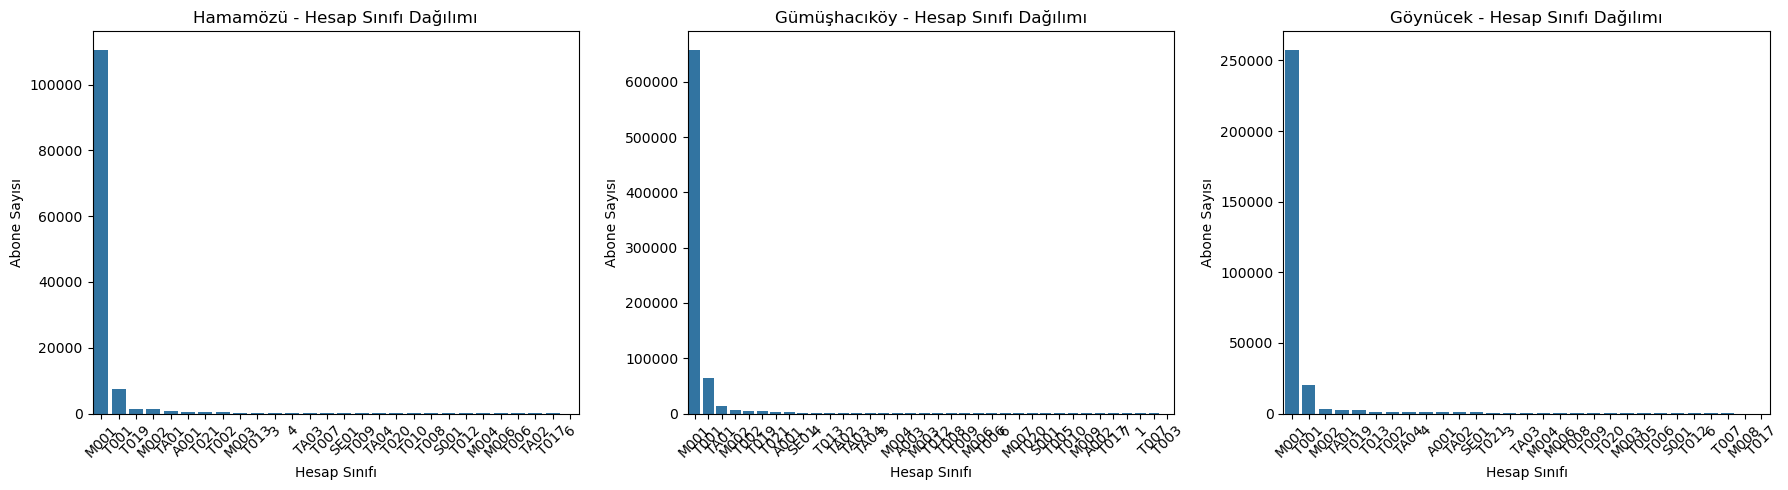

In [2]:
ilce_verileri = {
    "Hamamözü": df_tahakkuk,
    "Gümüşhacıköy": df_tahakkuk_1,
    "Göynücek": df_tahakkuk_2
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (ilce_adi, df) in zip(axes, ilce_verileri.items()):
    sns.countplot(x='hesap_sinifi', data=df, ax=ax, order=df['hesap_sinifi'].value_counts().index)
    ax.set_title(f"{ilce_adi} - Hesap Sınıfı Dağılımı")
    ax.set_xlabel("Hesap Sınıfı")
    ax.set_ylabel("Abone Sayısı")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## AYLIK ORTALAMA TÜKETİM VE MEVSİMSEL TREND

In [3]:
# datetime dönüşümü ve ay bilgisi çıkarımı
df_tuketim['mali_yil_donem'] = pd.to_datetime(df_tuketim['mali_yil_donem'])
df_tuketim['ay'] = df_tuketim['mali_yil_donem'].dt.month

In [4]:
df_tuketim.head()

,il,ilce,sozlesme_hesap_no,mali_yil_donem,fatura_tarihi,kayit_tarihi,vade_tarihi,hesap_sinifi,Hesap Sınıfı,kwh,ay
0,AMASYA,HAMAMÖZÜ,917576806,2023-01-01,2023-01-12,2023-03-06,2023-01-23,M001,Mesken,1.79,1
1,AMASYA,HAMAMÖZÜ,917576806,2023-01-01,2023-02-09,2023-05-11,2023-02-20,M001,Mesken,2.60,1
2,AMASYA,HAMAMÖZÜ,917576806,2023-02-01,2023-02-09,2023-05-11,2023-02-20,M001,Mesken,1.23,2
3,AMASYA,HAMAMÖZÜ,917576806,2023-02-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,2.56,2
4,AMASYA,HAMAMÖZÜ,917576806,2023-03-01,2023-03-10,2023-05-11,2023-03-20,M001,Mesken,1.35,3


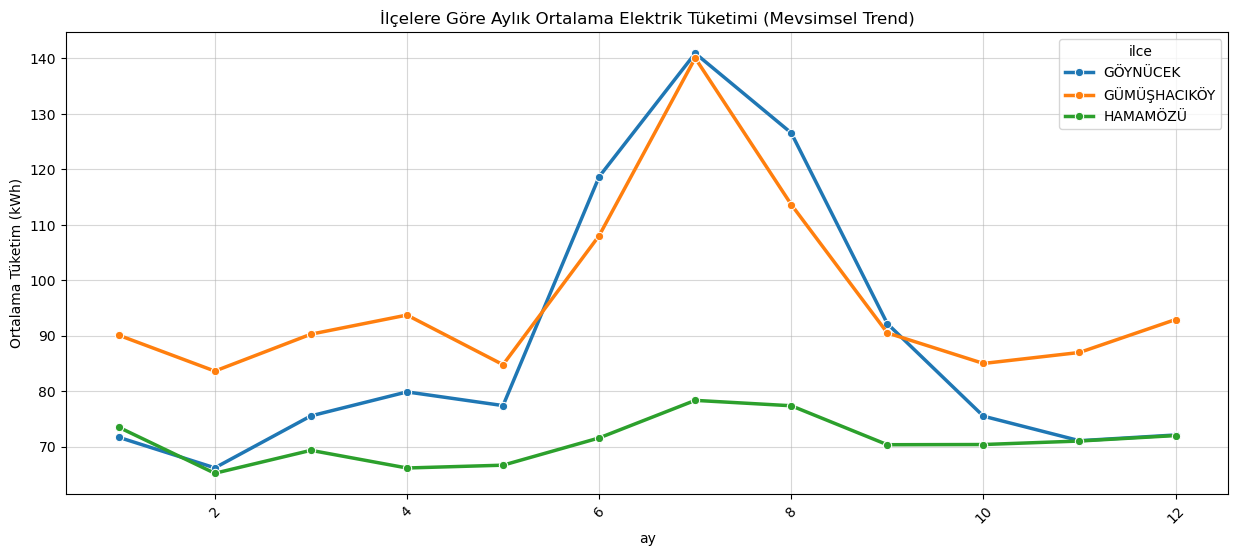

In [5]:
aylik_trend = df_tuketim.groupby(['ay', 'ilce'])['kwh'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='ay', y='kwh', hue='ilce', data=aylik_trend, marker='o', linewidth=2.5)
plt.title("İlçelere Göre Aylık Ortalama Elektrik Tüketimi (Mevsimsel Trend)")
plt.xticks(rotation=45)
plt.ylabel("Ortalama Tüketim (kWh)")
plt.grid(True, alpha=0.5)
plt.show()

## İLÇE VE ŞUBE DAĞILIMI (TAHSİLAT)

In [6]:
df_tahsilat.head()

,Şube,Kasa,İlçe,Söz.hsp.(bağımsız),Tahsilat Tarihi,Nakit Tahsilat,Mahsuben Tahsilat,Kredi Kartı Tahsilatı,Banka Tahsilatı
0,Tayin edilmedi,Tayin edilmedi,TAŞOVA,4989745446,2023-11-06,NaN,8648.95,NaN,NaN
1,Tayin edilmedi,Tayin edilmedi,TAŞOVA,4989745446,2024-06-26,NaN,762.40,NaN,NaN
2,Tayin edilmedi,Tayin edilmedi,TAŞOVA,4989745446,2024-07-10,NaN,311.60,NaN,NaN
3,PTT,PTT/PV,TAŞOVA,4254955886,2023-01-19,NaN,NaN,NaN,130.5
4,PTT,PTT/PV,TAŞOVA,4254955886,2023-02-17,NaN,NaN,NaN,117.0


/var/folders/40/gj75zf512wl3_p2dr2b8w2cm0000gn/T/ipykernel_14091/1699059368.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='İlçe', data=df_tahsilat, ax=ax[0], palette="magma")
/var/folders/40/gj75zf512wl3_p2dr2b8w2cm0000gn/T/ipykernel_14091/1699059368.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Şube', data=df_tahsilat[df_tahsilat['Şube'].isin(subeler)], ax=ax[1], palette="coolwarm", order=subeler)


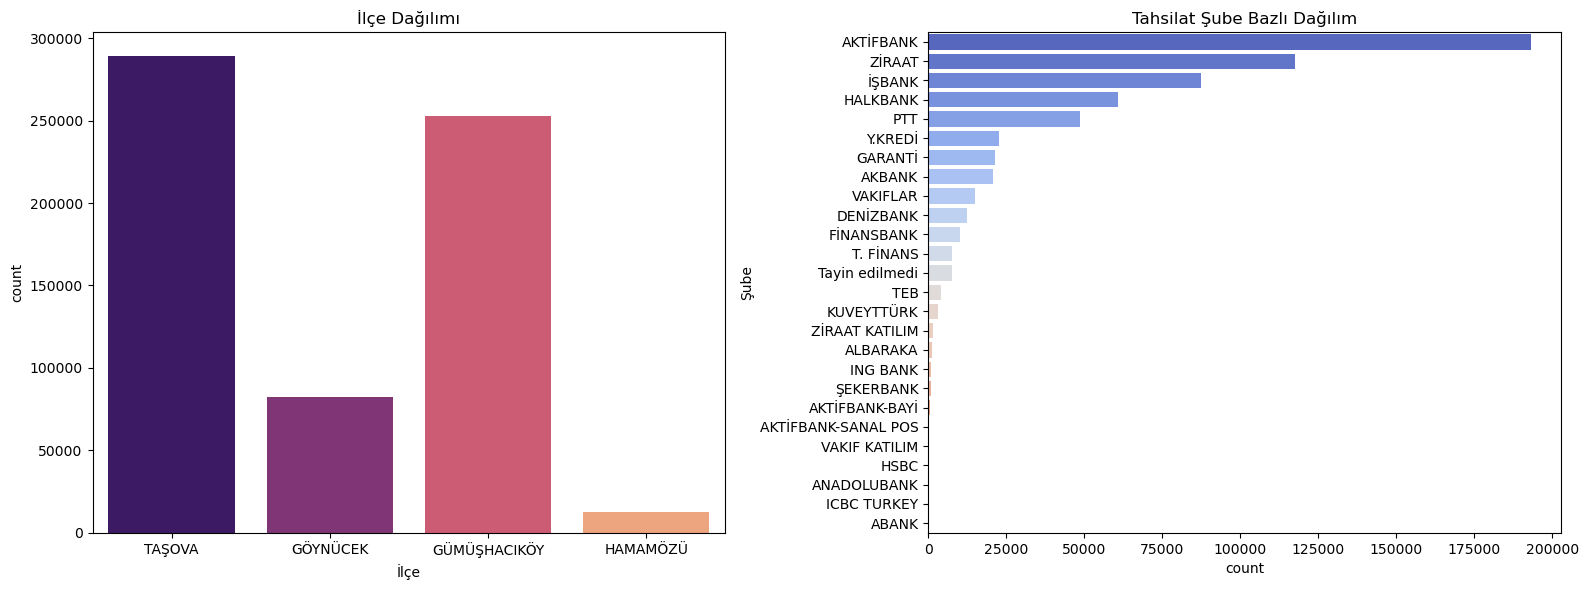

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

#İLÇE DAĞILIM
sns.countplot(x='İlçe', data=df_tahsilat, ax=ax[0], palette="magma")
ax[0].set_title("İlçe Dağılımı")

#Şube dağlım
subeler = df_tahsilat['Şube'].value_counts().index
sns.countplot(y='Şube', data=df_tahsilat[df_tahsilat['Şube'].isin(subeler)], ax=ax[1], palette="coolwarm", order=subeler)
ax[1].set_title("Tahsilat Şube Bazlı Dağılım")

plt.tight_layout()
plt.show()

## ZAMANINDA VS GEÇ ÖDEME ANALİZİ

In [8]:
df_tahsilat_1.columns

Index(['Mali yıl/dönem', 'İl', 'İlçe', 'Söz.hsp.(bağımsız)', 'Hesap Sınıfı',
       'Tahakkuk Tutar', 'Son Ödeme Tarihinden Önceki Tahsilat',
       'Son Ödeme Tarihindeki Tahsilat', 'Son Ödeme (1)', 'Son Ödeme (2)',
       'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)', 'Son Ödeme (6-10)',
       'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)',
       'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 'Son Ödeme (120-150)',
       'Son Ödeme (150-180)', 'Son Ödeme (180+)'],
      dtype='object')

Toplam Zamanında Ödeme: 308,328,468
Toplam Geç Ödeme: 157,984,135


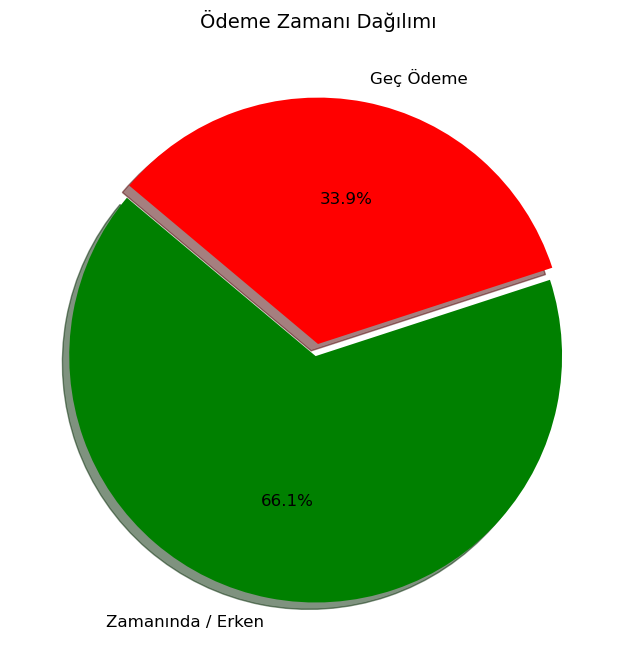

In [9]:
cols_zamaninda = [
    'Son Ödeme Tarihinden Önceki Tahsilat', 
    'Son Ödeme Tarihindeki Tahsilat'
]

cols_gec = [
    'Son Ödeme (1)', 'Son Ödeme (2)', 'Son Ödeme (3)', 'Son Ödeme (4)', 'Son Ödeme (5)',
    'Son Ödeme (6-10)', 'Son Ödeme (10-20)', 'Son Ödeme (20-30)', 'Son Ödeme (30-60)',
    'Son Ödeme (60-90)', 'Son Ödeme (90-120)', 'Son Ödeme (120-150)',
    'Son Ödeme (150-180)', 'Son Ödeme (180+)'
]

for col in cols_zamaninda + cols_gec:
    df_tahsilat_1[col] = pd.to_numeric(df_tahsilat_1[col], errors='coerce').fillna(0)

toplam_zamaninda = df_tahsilat_1[cols_zamaninda].sum().sum()
toplam_gec = df_tahsilat_1[cols_gec].sum().sum()

print(f"Toplam Zamanında Ödeme: {toplam_zamaninda:,.0f}")
print(f"Toplam Geç Ödeme: {toplam_gec:,.0f}")

labels = ['Zamanında / Erken', 'Geç Ödeme']
sizes = [toplam_zamaninda, toplam_gec]
colors = ['green', 'red']
explode = (0.05, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=140, explode=explode, shadow=True, textprops={'fontsize': 12})
plt.title("Ödeme Zamanı Dağılımı", fontsize=14)
plt.show()

## TÜKETİM DAĞILIMI VE OUTLIER TESPİTİ(kwh)

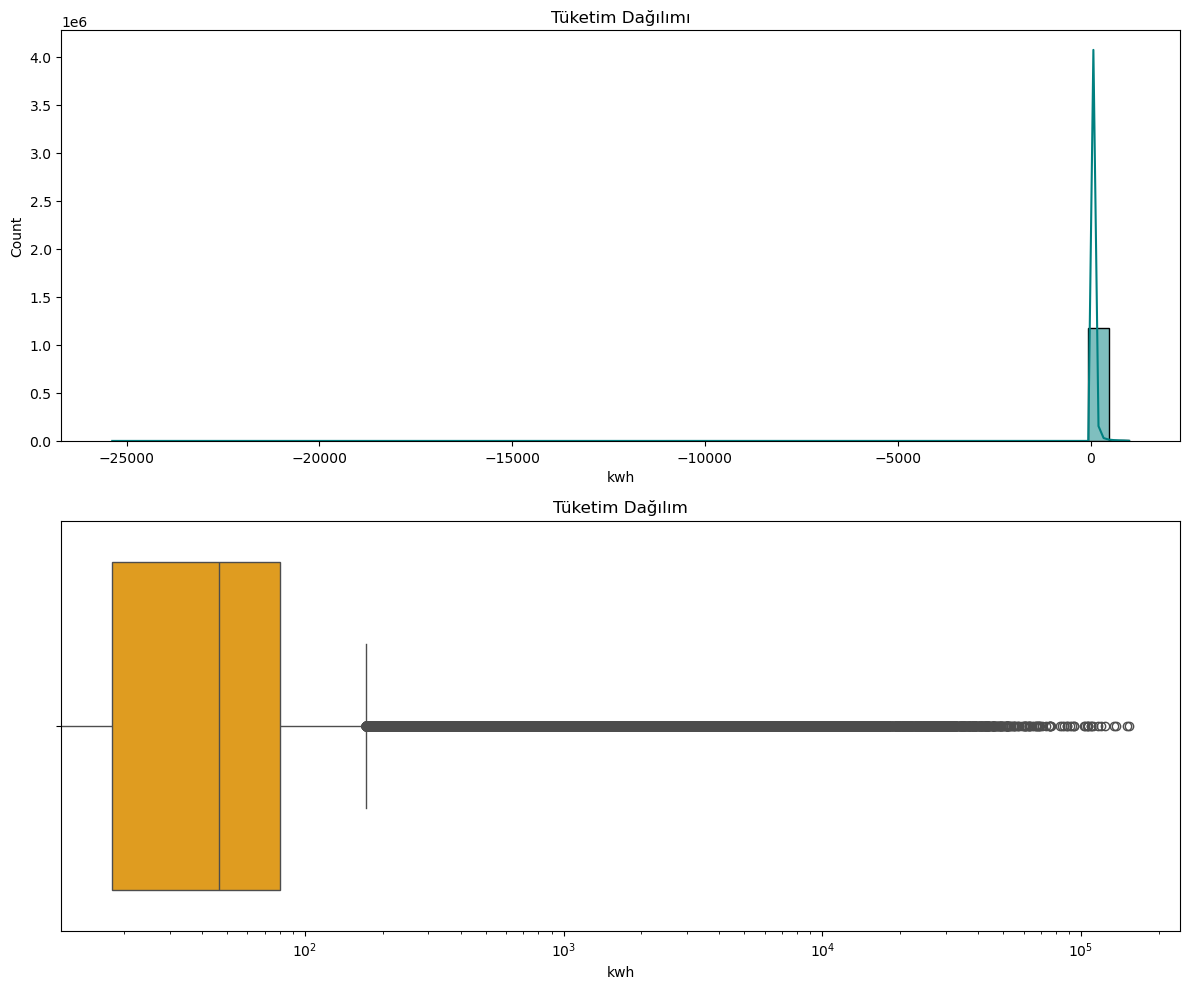

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.histplot(df_tuketim[df_tuketim['kwh'] < 1000]['kwh'], bins=50, kde=True, ax=ax[0], color="teal")
ax[0].set_title("Tüketim Dağılımı")

# Boxplot
sns.boxplot(x='kwh', data=df_tuketim, ax=ax[1], color="orange")
ax[1].set_title("Tüketim Dağılım")
ax[1].set_xscale('log')

plt.tight_layout()
plt.show()